In [2]:
import torch
import torchaudio
import numpy as np

import muspy
import pypianoroll as pypir

from utils import pianoroll2binaryroll, binaryroll2pitchlist, pitchlist2pianoroll, shortpitchlist2pitchlist, pitchlist2shortpitchlist
from utils import UNIT_AS_TICK, BEAT_AS_TICK, BAR_AS_TICK
from utils import relative_semitones_major, relative_semitones_minor

PATH_PREFIX = 'data_set/'
PATH_PREFIX_Q = 'quantized/'

In [3]:
from pathlib import Path

orig_data_dir = Path(PATH_PREFIX)
orig_file_list = sorted(list(orig_data_dir.rglob('*.mid')))

orig_file_list = [file.name for file in orig_file_list]

In [4]:
orig_filename = orig_file_list[0]

midi = muspy.read(f'{PATH_PREFIX}{orig_filename}')

orig_song_attrs = orig_filename.split('.')[0].split('-')

orig_bpm = float(orig_song_attrs[3])
orig_new_tempos = [muspy.Tempo(0, orig_bpm)]

orig_tempo_cleaned = midi.deepcopy()
orig_tempo_cleaned.tempos = orig_new_tempos

orig_key_and_mode = orig_song_attrs[2]

orig_transposed = orig_tempo_cleaned.deepcopy()

semitone_dict = relative_semitones_minor if 'm' in orig_key_and_mode else relative_semitones_major

orig_key = orig_key_and_mode[:-1] if len(orig_key_and_mode) > 1 else orig_key_and_mode

orig_transposed.transpose(-1 * semitone_dict[orig_key])

orig_pianoroll = muspy.to_pypianoroll(orig_transposed)

orig_pianoroll_obj = orig_pianoroll
orig_pianoroll = orig_pianoroll_obj.tracks[0].pianoroll

orig_quantized_pianoroll_obj = orig_pianoroll_obj.copy()
before_quantized_pianoroll = orig_quantized_pianoroll_obj.tracks[0].pianoroll
before_quantized_pianoroll_binaryroll = pianoroll2binaryroll(before_quantized_pianoroll)
before_quantized_pianoroll_pitch_list = binaryroll2pitchlist(before_quantized_pianoroll_binaryroll)

In [5]:
from collections import Counter

len_pitch_list = len(before_quantized_pianoroll_pitch_list)

short_quantized_pianoroll_pitch_list = []

for i in range(0, len_pitch_list, UNIT_AS_TICK):
    sliced = before_quantized_pianoroll_pitch_list[i : i + UNIT_AS_TICK]

    pitch_cnt_dict = dict(Counter(sliced))
    
    max_pitch_cnt_value = max(pitch_cnt_dict.values())
    max_pitch_cnt_pitch = [key for key, val in pitch_cnt_dict.items() if val == max_pitch_cnt_value][0]
    
    short_quantized_pianoroll_pitch_list.append(max_pitch_cnt_pitch)
    

quantized_pianoroll_pitch_list = shortpitchlist2pitchlist(short_quantized_pianoroll_pitch_list)

In [6]:
quant_data_dir = Path(PATH_PREFIX_Q)
quant_file_list = sorted(list(quant_data_dir.rglob('*.mid')))

quant_file_list = [file.name for file in quant_file_list]

quant_filename = quant_file_list[0]

quant_midi = muspy.read(f'{PATH_PREFIX_Q}{quant_filename}')
quant_pianoroll_obj = muspy.to_pypianoroll(quant_midi)
quant_pianoroll = quant_pianoroll_obj.tracks[0].pianoroll

quant_pianoroll_binaryroll = pianoroll2binaryroll(quant_pianoroll)
quant_pianoroll_pitch_list = binaryroll2pitchlist(quant_pianoroll_binaryroll)

quant_short_pitch_list = pitchlist2shortpitchlist(quant_pianoroll_pitch_list)
quant_pitch_list = shortpitchlist2pitchlist(quant_short_pitch_list)

[<Axes: xlabel='time (beat)', ylabel='\n\npitch'>]

[<Axes: xlabel='time (beat)', ylabel='\n\npitch'>]

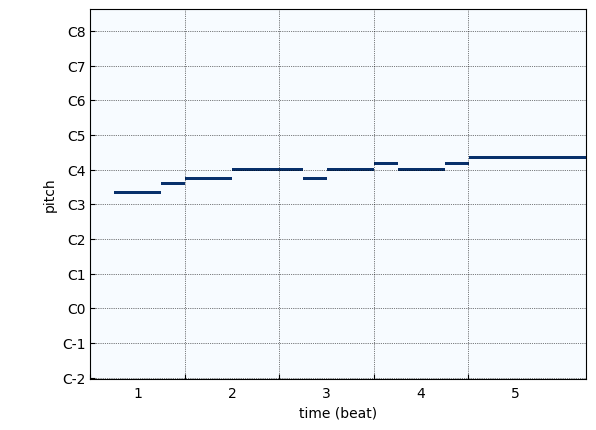

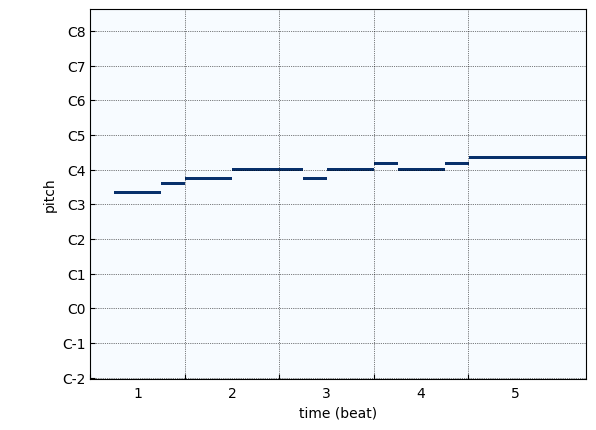

In [7]:
import IPython.display as ipd

orig_quantized_pianoroll_obj.tracks[0].pianoroll = pitchlist2pianoroll(quantized_pianoroll_pitch_list)
quant_pianoroll_obj.tracks[0].pianoroll = pitchlist2pianoroll(quant_pitch_list)

ipd.display(orig_quantized_pianoroll_obj.plot())
ipd.display(quant_pianoroll_obj.plot())

In [11]:
quant_data_dir = Path(PATH_PREFIX_Q)
quant_file_list = sorted(list(quant_data_dir.rglob('*.mid')))

quant_file_list = [file.name for file in quant_file_list]

all_pitch_list = []

for quant_filename in quant_file_list:
    quant_midi = muspy.read(f'{PATH_PREFIX_Q}{quant_filename}')
    quant_pianoroll_obj = muspy.to_pypianoroll(quant_midi)
    quant_pianoroll = quant_pianoroll_obj.tracks[0].pianoroll

    quant_pianoroll_binaryroll = pianoroll2binaryroll(quant_pianoroll)
    quant_pianoroll_pitch_list = binaryroll2pitchlist(quant_pianoroll_binaryroll)

    quant_short_pitch_list = pitchlist2shortpitchlist(quant_pianoroll_pitch_list)
    
    all_pitch_list += quant_short_pitch_list
    
all_pitch_set = set(all_pitch_list)

all_pitch_set
    

{0,
 46,
 49,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 97,
 99}